In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from SDP import SquareDalitzPlot
from scipy.interpolate import RegularGridInterpolator

## Load $D \rightarrow \pi \pi \pi$ dataset

In [13]:
mp_thetap = np.load('/home/tonym/Code/data/Dbar_pipipi_CPV_SDP_data_5e6.npy')

In [71]:
n_bins = 200
H, xedges, yedges = np.histogram2d(mp_thetap[:,0], mp_thetap[:,1], n_bins, density = True, range = [[0., 1.], [0.,1.]])
xedges_center = (xedges[:-1] + xedges[1:]) / 2
yedges_center = (yedges[:-1] + yedges[1:]) / 2

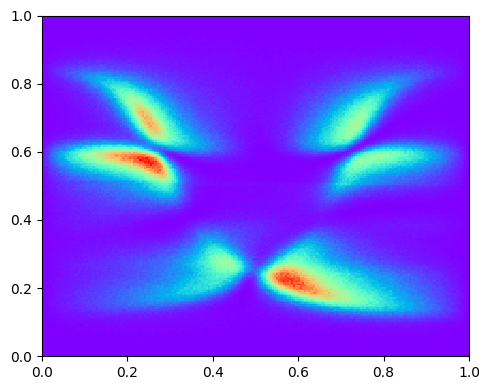

In [72]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.pcolormesh(xedges, yedges, H, cmap='rainbow')
fig.tight_layout()

In [73]:
print(H.shape)
print(xedges.shape)
print(yedges.shape)
print(xedges_center.shape)
print(yedges_center.shape)

(200, 200)
(201,)
(201,)
(200,)
(200,)


In [74]:
mp_thetap_interp = RegularGridInterpolator((xedges_center, yedges_center), H, bounds_error = False, fill_value = 0.0, method = 'linear')

In [75]:
print(mp_thetap_interp([0.5, 0.5]))
print(mp_thetap_interp([0.6, 0.2]))

[0.116]
[7.156]


In [76]:
n = 1000
x = np.linspace(0.,1.,n)
y = np.linspace(0.,1.,n)

xv, yv = np.meshgrid(x, y)

xy = np.stack((xv, yv), axis = -1)
print(xy.shape)

xy = np.reshape(xy, (n**2, 2))
print(xy.shape)

mp_thetap_fine_grid = mp_thetap_interp(xy)

(1000, 1000, 2)
(1000000, 2)


In [77]:
thetap = np.array([np.sum(mp_thetap_fine_grid[i::n]) for i in range(n)])
mp = np.array([np.sum(mp_thetap_fine_grid[i:i+n]) for i in range(0, n**2, n)])

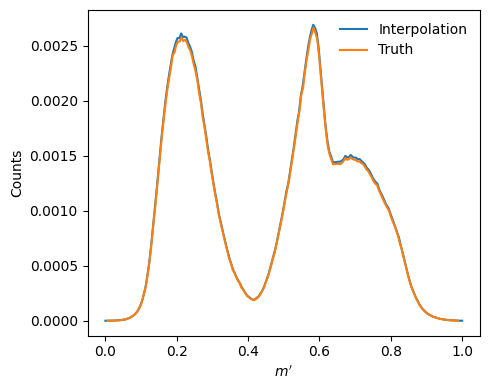

In [78]:
# Check the interpolation
fig, ax = plt.subplots(1,1,figsize=(5,4))

counts_thetap, thetap_bins = np.histogram(mp_thetap[:,0], n_bins)
thetap_bins_center = (thetap_bins[:-1] + thetap_bins[1:]) / 2

ax.plot(x, thetap / np.sum(thetap), label = r'Interpolation')
x_three = np.linspace(0,1,n_bins)
ax.plot(thetap_bins_center, (counts_thetap / np.sum(counts_thetap)) * n_bins / n, label = r'Truth')

ax.set_xlabel(r"$m'$")
ax.set_ylabel(r'Counts')
ax.legend(frameon = False)
fig.tight_layout()

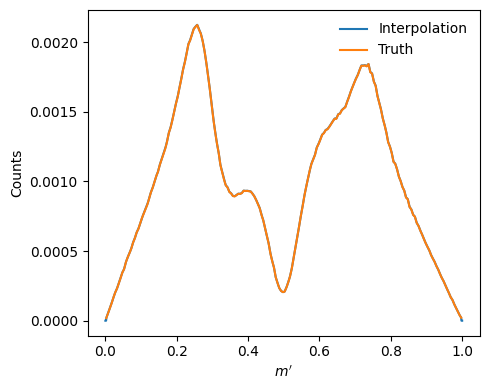

In [79]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

counts_mp, mp_bins = np.histogram(mp_thetap[:,1], n_bins)
mp_bins_center = (mp_bins[:-1] + mp_bins[1:]) / 2

ax.plot(x, mp / np.sum(mp), label = r'Interpolation')
x_three = np.linspace(0,1,n_bins)
ax.plot(mp_bins_center, (counts_mp / np.sum(counts_mp)) * n_bins / n, label = r'Truth')

ax.set_xlabel(r"$m'$")
ax.set_ylabel(r'Counts')
ax.legend(frameon = False)
fig.tight_layout()

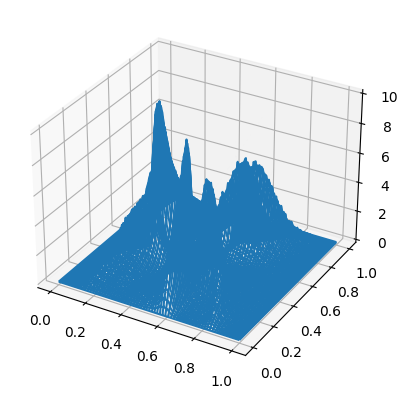

In [80]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(xv, yv, mp_thetap_interp((xv, yv)), rstride=10, cstride=15)

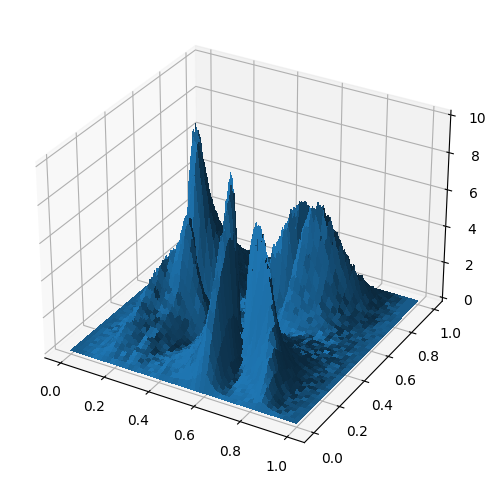

In [81]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

# Plot a basic wireframe.
ax.plot_surface(xv, yv, mp_thetap_interp((xv, yv)), antialiased = False)

In [131]:
# Now let's see if I can sample by reweighing uniformly sampled points
n_rand = 500000
rand = np.random.uniform(size=(n_rand,2))
print(rand[0:10])
weights = mp_thetap_interp(rand)
print(weights[0:10])

[[0.76505943 0.43248826]
 [0.38196544 0.61524408]
 [0.7952909  0.71126145]
 [0.55825795 0.39056173]
 [0.77058373 0.79221768]
 [0.98299151 0.00440528]
 [0.65562486 0.44707275]
 [0.21820971 0.1957181 ]
 [0.96798383 0.764634  ]
 [0.90024673 0.62812695]]
[0.29963802 0.25830247 1.23535894 0.03511148 3.12143222 0.
 0.46436189 0.99287067 0.         0.03816167]


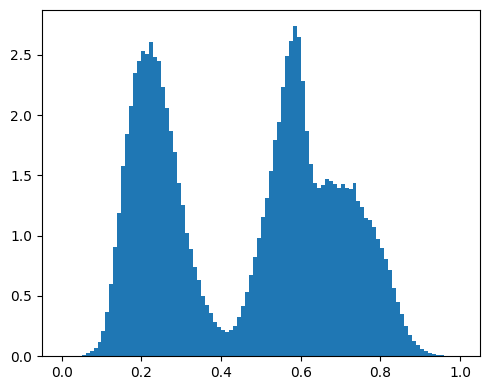

In [132]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.hist(rand[:,0], 100, weights = weights, density = True)
fig.tight_layout()

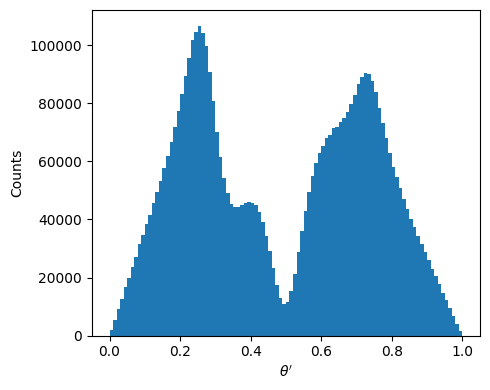

In [21]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.hist(mp_thetap[:,1], 100)
ax.set_xlabel(r"$\theta'$")
ax.set_ylabel(r'Counts')
fig.tight_layout()

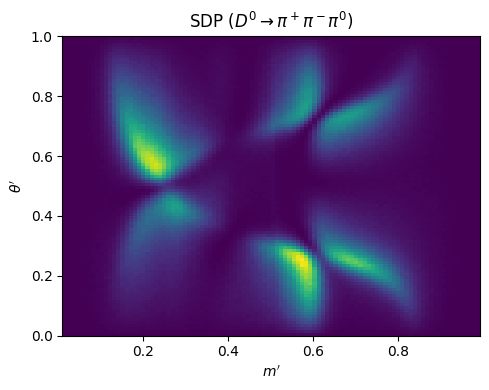

In [28]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.hist2d(mp_thetap[:,0], mp_thetap[:,1], 100)
ax.set_xlabel(r"$m'$")
ax.set_ylabel(r"$\theta'$")
ax.set_title(r'SDP ($D^0 \rightarrow \pi^+ \pi^- \pi^0$)')
fig.tight_layout()

In [5]:
N = 1000000
s12s13s23_Dbar = []
# Create the Dbar-dataset
with open(PATH_Dbar, 'r') as f:
    for i in tqdm(range(N)):
        f.readline()
        # Split masses into list
        ls = f.readline().split()
        s12s13s23_Dbar.append(np.array([float(ls[0]), float(ls[1]), float(ls[2])]))

s12s13s23_Dbar = np.array(s12s13s23_Dbar)

100%|██████████| 1000000/1000000 [00:03<00:00, 258427.54it/s]


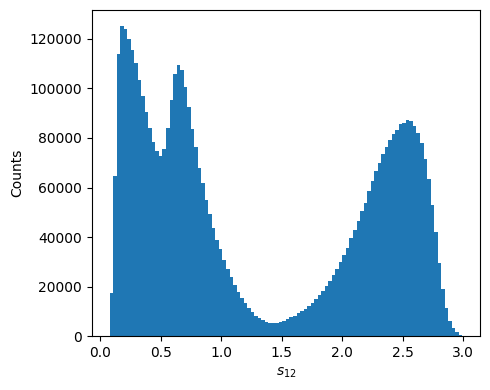

In [7]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.hist(s12s13s23_Dbar[:,2], 100)
ax.set_xlabel(r'$s_{12}$')
ax.set_ylabel(r'Counts')
fig.tight_layout()

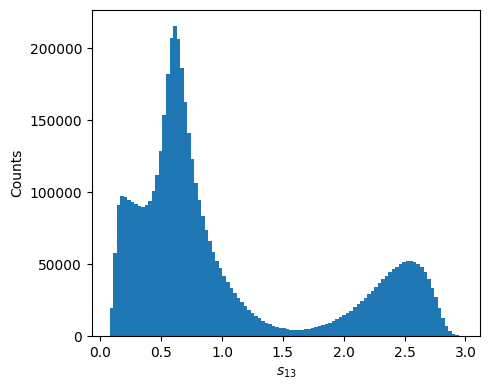

In [8]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.hist(s12s13s23_Dbar[:,1], 100)
ax.set_xlabel(r'$s_{13}$')
ax.set_ylabel(r'Counts')
fig.tight_layout()

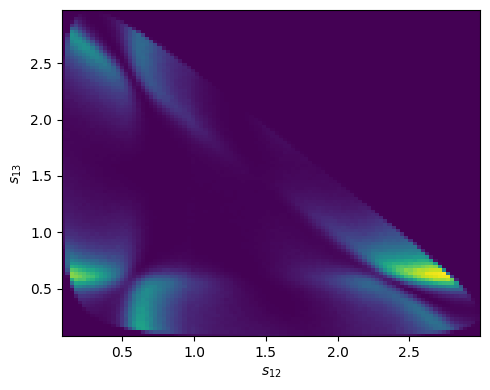

In [9]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.hist2d(s12s13s23_Dbar[:,2], s12s13s23_Dbar[:,1], 100)
ax.set_xlabel(r'$s_{12}$')
ax.set_ylabel(r'$s_{13}$')
fig.tight_layout()

In [5]:
mD  = 1.86483 # GeV
mpi_pm = 0.13957018 # GeV
mpi_0  = 0.1349770 # GeV

SDP = SquareDalitzPlot(mD, mpi_pm, mpi_pm, mpi_0)

# Convert to square Dalitz plot variables from Dalitz plot variables
mp_thetap = []
for i in tqdm(range(len(s12s13s23_Dbar)), ncols = 100):
    mp = SDP.MpfromM(s12s13s23_Dbar[i,2], s12s13s23_Dbar[i,1], 1, 2, 3)
    thetap = SDP.TfromM(s12s13s23_Dbar[i,2], s12s13s23_Dbar[i,1], 1, 2, 3)
    mp_thetap.append(np.array([mp, thetap]))

mp_thetap = np.array(mp_thetap)

100%|██████████████████████████████████████████████████| 5000000/5000000 [02:01<00:00, 41081.26it/s]


In [6]:
np.save('/home/tonym/Code/Dbar_pipipi_SDP_data_5e6.npy', mp_thetap)

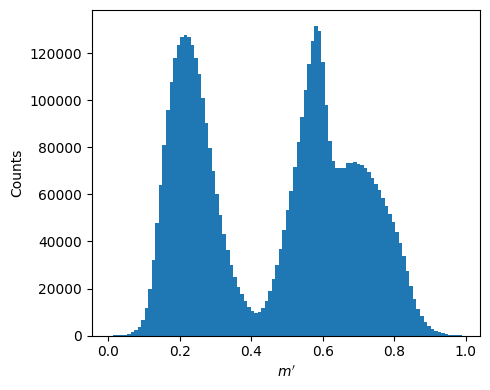

In [10]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.hist(mp_thetap[:,0], 100)
ax.set_xlabel(r"$m'$")
ax.set_ylabel(r'Counts')
fig.tight_layout()

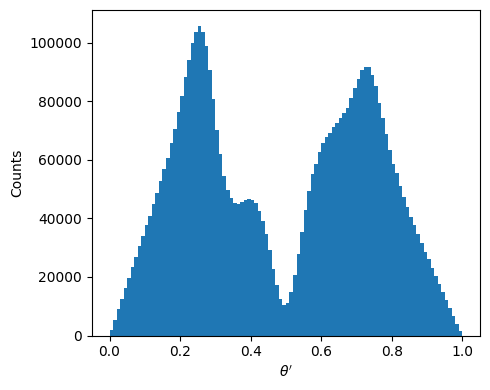

In [11]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.hist(mp_thetap[:,1], 100)
ax.set_xlabel(r"$\theta'$")
ax.set_ylabel(r'Counts')
fig.tight_layout()

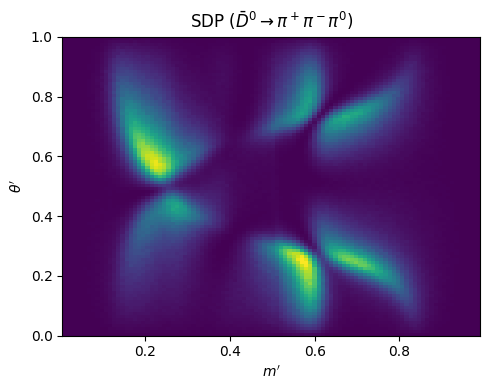

In [13]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.hist2d(mp_thetap[:,0], mp_thetap[:,1], 100)
ax.set_xlabel(r"$m'$")
ax.set_ylabel(r"$\theta'$")
ax.set_title(r'SDP ($\bar{D}^0 \rightarrow \pi^+ \pi^- \pi^0$)')
fig.tight_layout()